In [1]:
import torch
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [64]:
train_data = datasets.MNIST(
    root='data',  # where to download?
    train=True,  # do we want the train/test datasets?
    download=True,
    transform=ToTensor(),  # how to transform the data
    target_transform=None  # how to transform the target
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [65]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [66]:
test = train_data[0]
test_img, test_label = test
test_img, test_label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

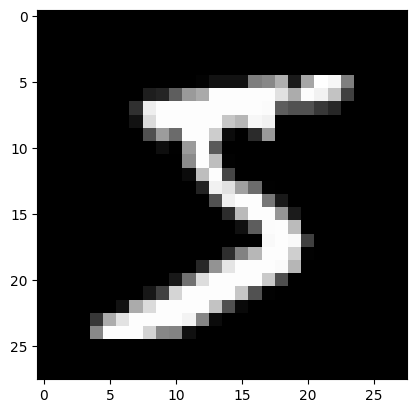

In [67]:
plt.gray()
plt.imshow(test_img.squeeze())
plt.show()

In [68]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=len(train_data),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=len(test_data),
                             shuffle=False)

X_train, y_train = next(iter(train_dataloader))
X_test, y_test = next(iter(test_dataloader))

In [69]:
X_train, y_train

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [70]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [92]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class DigitModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

model = DigitModel(input_features=784,
                   output_features=10,
                   hidden_units=16).to(device)

model

DigitModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [93]:
model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.0211,  0.0329,  0.0224,  ..., -0.0280, -0.0351, -0.0130],
                      [-0.0158,  0.0201,  0.0244,  ...,  0.0145,  0.0028, -0.0156],
                      [-0.0278,  0.0245,  0.0213,  ..., -0.0025,  0.0167,  0.0229],
                      ...,
                      [-0.0243, -0.0336, -0.0223,  ...,  0.0053, -0.0124,  0.0085],
                      [-0.0310,  0.0152,  0.0249,  ...,  0.0100,  0.0001,  0.0313],
                      [-0.0226,  0.0311,  0.0247,  ...,  0.0165,  0.0068, -0.0168]],
                     device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([ 0.0112,  0.0265,  0.0299, -0.0001, -0.0333, -0.0206,  0.0199,  0.0326,
                       0.0222,  0.0201,  0.0341, -0.0101,  0.0255, -0.0050,  0.0261,  0.0165],
                     device='cuda:0')),
             ('linear_layer_stack.2.weight',
              tensor([[-0.0157, -0.0296,  0.1118, -0.0583, -0.0113

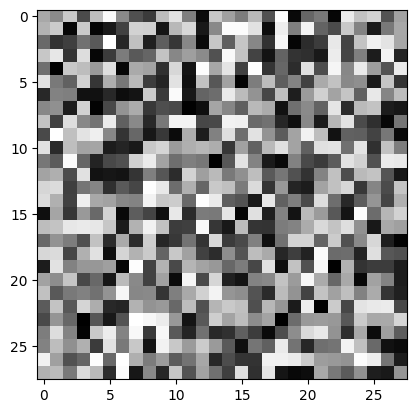

In [94]:
X_rand = torch.rand(size=(28, 28))
plt.gray()
plt.imshow(X_rand)
plt.show()

In [95]:
model(X_rand.reshape([784]).to(device))

tensor([ 0.0188,  0.2352,  0.1561, -0.1242, -0.1930,  0.1377, -0.0041,  0.0610,
         0.3243,  0.0097], device='cuda:0', grad_fn=<ViewBackward0>)

In [96]:
torch.softmax(model(X_rand.reshape([784]).to(device)), dim=0)

tensor([0.0947, 0.1176, 0.1086, 0.0821, 0.0766, 0.1067, 0.0926, 0.0988, 0.1285,
        0.0938], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [97]:
torch.softmax(model(X_rand.reshape([784]).to(device)), dim=0).argmax()

tensor(8, device='cuda:0')

In [98]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

# evaluation metric
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()  # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [99]:
epochs = 4000

X_train = X_train.reshape([60000, 784]).to(device)
y_train = y_train.to(device)

X_test = X_test.reshape([10000, 784]).to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model.train()

    y_logits = model(X_train)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        y_test_logits = model(X_test)
        y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=y_test_preds)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch}")
        print(f"Train loss: {loss:.3f} | Test acc: {test_acc:.3f}")

Train loss: 1.020 | Test acc: 73.050
Train loss: 0.499 | Test acc: 86.110
Train loss: 0.391 | Test acc: 88.760
Train loss: 0.350 | Test acc: 89.990
Train loss: 0.328 | Test acc: 90.760
Train loss: 0.312 | Test acc: 91.110
Train loss: 0.300 | Test acc: 91.570
Train loss: 0.289 | Test acc: 91.900
Train loss: 0.280 | Test acc: 91.950
Train loss: 0.271 | Test acc: 92.070
Train loss: 0.262 | Test acc: 92.280
Train loss: 0.254 | Test acc: 92.510
Train loss: 0.246 | Test acc: 92.750
Train loss: 0.238 | Test acc: 92.940
Train loss: 0.230 | Test acc: 93.080
Train loss: 0.224 | Test acc: 93.290
Train loss: 0.217 | Test acc: 93.540
Train loss: 0.212 | Test acc: 93.840
Train loss: 0.206 | Test acc: 93.870
Train loss: 0.201 | Test acc: 93.970
Train loss: 0.197 | Test acc: 94.090
Train loss: 0.193 | Test acc: 94.180
Train loss: 0.189 | Test acc: 94.320
Train loss: 0.185 | Test acc: 94.420
Train loss: 0.182 | Test acc: 94.490
Train loss: 0.178 | Test acc: 94.570
Train loss: 0.175 | Test acc: 94.620
T

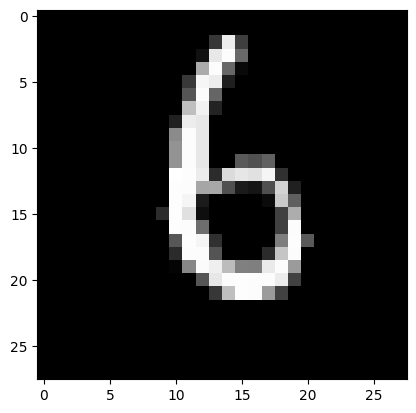

In [112]:
import random

idx = random.randint(0, len(train_data))

test = train_data[idx]
test_img, test_label = test

plt.gray()
plt.imshow(test_img.squeeze())
plt.show()

In [113]:
model(test_img.reshape([784]).to(device)).softmax(dim=0).argmax()

tensor(6, device='cuda:0')